<a href="https://colab.research.google.com/github/LiliiaCheban/data-and-python/blob/main/Clean_2_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set 1 - Calorie burning

There will often be missing values, duplicate records and values that are incorrectly formatted. These can affect summary statistics and graphs plotted from the data

Invalid, missing, or incorrectly formatted values can affect summary statistics and graphs generated from the data.
In Data Calorie burning you can visually see incorrect and missing values. In the Duration set there is clearly a mechanical error that can be intuitively replaced by the cell with index 7 (df.loc[7, 'Duration'] ) with the expected value, since there are only three values found in this set.
It is necessary to bring the Date set into standard format and fill in the missing date with index 22 (df.loc[22, 'Date'] = '2020-12-22 00:00:00').
We check the dataframe for the presence of zero values, two values in the Calories set. For further analysis of the dependence of average Calories on Duration, it is necessary to remove them. Perhaps the overall result of calorie loss over a monthly period, the absence of two values is not significant.
(df.dropna(subset=['Calories'])). Perhaps the average of Maxpulse versus Duration has a more significant meaning for the person measuring these indicators.

Часто встречаются отсутствующие значения, повторяющиеся записи и значения, которые имеют неправильный формат. Это может повлиять на сводную статистику и графики, построенные на основе данных.

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

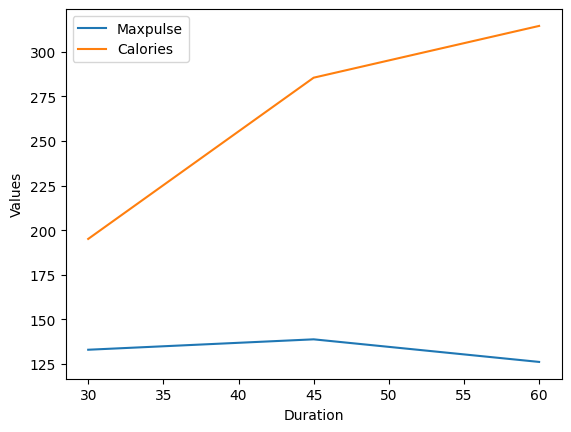

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/dirtydata.csv"
df = pd.read_csv(url)
 #inspect the dataset
print(df.head(31))

#replacing the value in the row with index 7 in the Duration dataset
df.loc[7, 'Duration'] = 45
#bringing Date dataset values into standard format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#replacing the value in the row with index 22 in the Date dataset
df.loc[22, 'Date'] = '2020-12-22 00:00:00'
print(df.head(31))
#checking for null values in each dataset
print('checking for null values in each dataset')
print(df.isnull().sum())
#deleting null values in the Calories dataset
df = df.dropna(subset=['Calories'])
#checking for null values in each dataset
print(df.info())
print('mean dependence of Calories on Duration')
print(df.groupby(['Duration']) ['Calories'].mean()) # mean dependence of Calories on Duration
print('mean dependence of Maxpulse on Duration')
print(df.groupby(['Duration']) [['Maxpulse','Calories']].mean()) # mean dependence of Maxpulse on Duration and Calories
grouped_data = df.groupby(['Duration'])[['Maxpulse', 'Calories']].mean().reset_index()
plt.plot(grouped_data['Duration'], grouped_data['Maxpulse'], label='Maxpulse')
plt.plot(grouped_data['Duration'], grouped_data['Calories'], label='Calories')


plt.xlabel('Duration')
plt.ylabel('Values')
plt.legend()
plt.show()

Data set 2 - Presidential election voting
[ ]


In the Presidential election voting dataframe, after checking for null values, a completely empty national_voteshare_3rd_lo set was detected, which can be deleted. (df.drop('national_voteshare_3rd_lo', axis=1)
There are also 97 NaN values in each national turnout. It is advisable to replace the NaN value with the number 0 for further calculations; perhaps national turnout sets will be important for further research.
df['national_turnout'].fillna(0, inplace=True)
df['national_turnout_hi'].fillna(0, inplace=True)
df['national_turnout_lo'].fillna(0, inplace=True)
Convert modeldate and timestamp to datetime format.

In [11]:
import pandas as pd


url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv"
df = pd.read_csv(url)

#print(df.tail())
# Print information about the DataFrame, including the number of non-blank values in each column
print(df.info())
# Count the number of null values in each column
df.isnull().values.any()
# Count the number of null values in each column
print(df.isnull().sum())
# Remove empty column
df = df.drop('national_voteshare_3rd_lo', axis=1)
# Formatting dates
# If there are date columns, convert them to datetime format
df['modeldate'] = pd.to_datetime(df['modeldate'], errors='coerce')  # 'coerce' will handle any errors during conversion
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

#replacing null values with 0 for ease of calculation national turnout
df['national_turnout'].fillna(0, inplace=True)
df['national_turnout_hi'].fillna(0, inplace=True)
df['national_turnout_lo'].fillna(0, inplace=True)
print(df.tail())

from google.colab import files
df.to_csv('Voting.csv')
files.download('Voting.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       156 non-null    int64  
 1   branch                      156 non-null    object 
 2   model                       156 non-null    object 
 3   modeldate                   156 non-null    object 
 4   candidate_inc               156 non-null    object 
 5   candidate_chal              156 non-null    object 
 6   nat_voteshare_other_hi      156 non-null    float64
 7   national_voteshare_inc_lo   156 non-null    float64
 8   national_voteshare_chal_lo  156 non-null    float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      156 non-null    float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-